# COGS 108 Final Project

## Group Members:
- A13642946 (Xuqian Tan)
- A13817367 (Yushan Liu)
- A13311043 (Xuhan Yang)
- A13712899 (Weixiu Dong)


## Research Question

What was the trend in gender and racial diversity of instructional staff in the U.S. postsecondary educational institutions from 2009 to 2017?

## Hypothesis

We believe that there was an increase in instructional staff diversity(gender and race) among U.S. postsecondary educational institutions from the 2009 to 2017. 


## Introduction and Background

A lack of diversity in educational system has often been discussed by the public, but the spotlight mainly shines on the student body. Surprisingly, the teachers and instructional staff, who play important roles in the educational system, appear to be less diverse than their student counterparts. In a study done in 2004, it is shown that “the majority of teachers continue to be white (87%), females (74%) and middle-class” (Banks & Banks). However, diversity in teachers is essential in many ways. Diversity in teachers’ backgrounds reflect the composition of our society, and teachers representing minority groups are likely to become role models for students from minority groups and help break negative stereotypes of minority groups (U.S. Department of Education, Policy and Program Studies Service Office of Planning, Evaluation, and Policy Development.). 

As we acknowledge that there are many other factors contributing to one’s cultural identity and should be studied, in this project, we will focus on gender and racial diversity among full-time instructional staff in postsecondary educational institutions and beyond. We believe that an institute with better represented gender and racial composition provides more inclusive educational environment. From our data, instructional staff includes professor, associate professor, assistant professor, instructor, lecturer and instructors with no academic rank. There has been past research focusing on similar issues, but not exactly at this aspect. For example, the U.S. Department of Education Schools and Staffing Survey (SASS), with the most recent one in 2016, reports that “a nationally representative survey of teachers and principals, showed that 82 percent of public school teachers identified as white”. The report looks at racial diversity in all public schools from elementary to postsecondary institutions. As college students, we are more interested in the situation in universities and other postsecondary educational institutions. Specifically, postsecondary educational institutions refer to those that offer an associate’s, bachelor’s, or above degrees. Despite the previous unpromising result from the entire educational system, there have been past actions taken to mitigate such issues. For example, UCSD has declared an equal education and employment opportunity statement on their website (“Equal Opportunity/ Nondiscrimination/ Nonharassment Statement”). Actions like these help us build confidence in the field and develop our hypothesis: we believe that there has been an improvement in gender and racial diversity among full-time instructional staff in postsecondary institutions from 2006 to 2017. 


Reference:

Banks, J.A. & McGee-Banks, C.A. (Eds.). Multicultural education: Issues and perspectives (5th ed.). New York: John Wiley & Sons. 

“Equal Opportunity/ Nondiscrimination/ Nonharassment Statement”.  UCSD Human Resources, https://blink.ucsd.edu/HR/policies/affirmative/equal.html. 
 
U.S. Department of Education, National Center for Education Statistics. “Table 209.10: Number and percentage distribution of teachers in public and private elementary and secondary schools, by selected teacher characteristics: Selected years, 1987-88 through 2011-12.” Digest of Education Statistics, 2013. https://nces.ed.gov/programs/digest/d13/tables/dt13_209.10.asp

U.S. Department of Education, Policy and Program Studies Service Office of Planning, Evaluation, and Policy Development.  “The State of Racial Diversity in the Educator Workforce.” 2016. https://www2.ed.gov/rschstat/eval/highered/racial-diversity/state-racial-diversity-workforce.pdf

## Data Description

There are two sets of data that we plan to use. The first dataset from [IPEDS Data Center](https://www.census.gov/data/datasets/2010/demo/popest/modified-race-data-2010.html),
the national center for education statistics, is a dataset regarding the gender and race statistics of full-time instructional staff from postsecondary educational institutes in United States respectively. The result is recorded each year, and only the data in every odd-numbered year is mandatory. One thing to note is that the data is organized in different ways pre and post 2008. For the sake of simplicity, we decide to take the data from 09, 11, 13, 15, 17 to study the diversity in the U.S. postsecondary education employment. In our raw data, the rows represent the population counts in institution per “ARANK”. “ARANK” is the column for a more detailed subcategory of academic rank, like full-time lecturer vs. professor. Therefore, each institution is represented by a unique “UNITID”. This means that one institution can have multiple rows in the dataframe. Each column is further explained in the dictionary dataframe, but most of those are counts of a specific subgroup. For example, “ASIATP” is the total population of Asians, “ASIATM” is the total male populations of Asians. 


The second dataset is [the U.S. population census in 2010](https://www.census.gov/data/datasets/2010/demo/popest/modified-race-data-2010.html). 
As we are interested in the dynamics in the academic teaching world, we need a reference population distribution on gender and race. We select the 2010 census because U.S. census occurs every 10 years and it is the only census that occured in our year-span. Although 2010 is more towards the earlier years of our year-span and the U.S. population has been increasing ever since, we assume that the proportion of each gender and race in the general population have not changed much.


## Load & Clean the Data

In [1]:
# Imports
%matplotlib inline

import numpy as np

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


### Load the data
Import datasets.

In [2]:
# Load the file 2009
df_9 = pd.read_csv("data/s2009_f_rv.csv")

# Load the file 2011
df_11 = pd.read_csv("data/s2011_f_rv.csv")

# Load the file 2013
df_13 = pd.read_csv("data/s2013_is_rv.csv")

# Load the file 2015
df_15 = pd.read_csv("data/s2015_is_rv.csv")

# Load the file 2017
df_17 = pd.read_csv("data/s2017_is.csv")

df_list = [df_9, df_11, df_13, df_15, df_17]

# Displaying dataframe example
df_9.head(5)

,UNITID,ARANK,XHRTOTLT,HRTOTLT,XHRTOTLM,HRTOTLM,XHRTOTLW,HRTOTLW,XDVHRAIT,DVHRAIT,...,XHRUNKNM,HRUNKNM,XHRUNKNW,HRUNKNW,XHRNRALT,HRNRALT,XHRNRALM,HRNRALM,XHRNRALW,HRNRALW
0,100654,1,R,44,R,31,R,13,Z,0,...,Z,0,Z,0,R,6,R,6,Z,0
1,100654,2,R,38,R,30,R,8,Z,0,...,Z,0,Z,0,R,3,R,3,Z,0
2,100654,3,R,43,R,27,R,16,Z,0,...,Z,0,Z,0,R,4,R,2,R,2
3,100654,4,R,1,R,1,Z,0,Z,0,...,Z,0,Z,0,Z,0,Z,0,Z,0
4,100654,7,R,126,R,89,R,37,Z,0,...,Z,0,Z,0,R,13,R,11,R,2


### Load the dictionary
Import dictionaries that are used to intepret column names of our data set loaded above. 

In [3]:
# Load the file 2009
xls = pd.ExcelFile('data/dictionary/s2009_f.xls')
df_dict_9 = pd.read_excel(xls, 'varlist')
# Load the file 2011
xls = pd.ExcelFile('data/dictionary/s2011_f.xls')
df_dict_11 = pd.read_excel(xls, 'varlist')

# Display dictionary example
df_dict_11.head()

,varnumber,varname,DataType,Fieldwidth,format,imputationvar,NAME,varTitle
0,1,UNITID,N,6,Cont,NaN,UNITID,Unique identification number of the institution
1,50356,ARANK,N,3,Disc,NaN,ARANK,Tenure status and academic rank of full-time i...
2,50476,HRTOTLT,N,6,Cont,XHRTOTLT,HRTOTLT,Grand total
3,50431,HRTOTLM,N,6,Cont,XHRTOTLM,HRTOTLM,Grand total men
4,50436,HRTOTLW,N,6,Cont,XHRTOTLW,HRTOTLW,Grand total women


### Expected Distribution of Races from Census Data of 2010
Load national census data of race composition ratios from 2010
(as the original dataset is a plain report excel sheet of census result, we decide to hard code the expected numbers for simplicity and readability)

In [4]:
# American Indian and Alaska Native
AIANTP = 1.2
# Asian
ASIATP = 4.9
# Black or African American total percent
BKAATP = 13.0
# Hispanic or Latino, regardless of race.
HISPTP = 15.9
# Native Hawaiian or Other Pacific Islander total
NHPITP = 0.2
# White total percent
WHITTP = 78.4
# Two or more races total
TMORTP = 2.3

census_race = np.array([AIANTP, ASIATP, BKAATP, NHPITP, WHITTP, TMORTP]) / 100

# Race/ethnicity unknown total is not given in census, and the overal percentages of 5 races add up to 100%

### Clean N/A
We remove all the N/A data from our dataset, with respect to imputation standards from the original data dictionary:
- A	Not applicable
- B	Institution left item blank
- C	Analyst corrected reported value
- D	Do not know
- G	Data generated from other data values
- H	Value not derived - data not usable
- J	Logical imputation
- K	Ratio adjustment 
- L	Imputed using the Group Median procedure
- N	Imputed using Nearest Neighbor procedure
- P	Imputed using Carry Forward procedure
- R	Reported
- Z	Implied zero

In [5]:
# Extract imputation index
imputation_list = []
for column in df_list[2]:
    if 'X' in column:
        imputation_list.append(column)

# Drop NA
for df_i in df_list:
    for imput_index in imputation_list:
        df_i.drop(df_i.loc[df_i[imput_index].isin(['A', 'B', 'D', 'H'])].index, inplace=True)
df_list[0].head()

,UNITID,ARANK,XHRTOTLT,HRTOTLT,XHRTOTLM,HRTOTLM,XHRTOTLW,HRTOTLW,XDVHRAIT,DVHRAIT,...,XHRUNKNM,HRUNKNM,XHRUNKNW,HRUNKNW,XHRNRALT,HRNRALT,XHRNRALM,HRNRALM,XHRNRALW,HRNRALW
48,100724,1,R,55,R,38,R,17,R,2,...,Z,0,Z,0,Z,0,Z,0,Z,0
49,100724,2,R,39,R,14,R,25,Z,0,...,Z,0,Z,0,Z,0,Z,0,Z,0
50,100724,3,R,10,R,3,R,7,Z,0,...,Z,0,Z,0,Z,0,Z,0,Z,0
51,100724,4,R,2,Z,0,R,2,Z,0,...,Z,0,Z,0,Z,0,Z,0,Z,0
52,100724,7,R,106,R,55,R,51,R,2,...,Z,0,Z,0,Z,0,Z,0,Z,0


### Keep only useful columns
- After cleaning up N/A cells, we remove imputation index columns

In [6]:
# Drop imputation columns after cleaning NA
for df_i in df_list:
    for column in df_i:
        if 'X' in column:
            df_i.drop(column, axis=1, inplace=True)

# Handle dataset 2009 seperately due to version difference
df_temp = pd.DataFrame()
for column in df_list[1]:
        df_temp[column] = df_list[0][column]

df_list[0] = df_temp

# Displaying the resulting dataframe example
df_list[0].head()

,UNITID,ARANK,HRTOTLT,HRTOTLM,HRTOTLW,HRAIANT,HRAIANM,HRAIANW,HRASIAT,HRASIAM,...,HRWHITW,HR2MORT,HR2MORM,HR2MORW,HRUNKNT,HRUNKNM,HRUNKNW,HRNRALT,HRNRALM,HRNRALW
48,100724,1,55,38,17,2.0,1.0,1.0,11.0,10.0,...,2.0,0.0,0.0,0.0,0,0,0,0,0,0
49,100724,2,39,14,25,0.0,0.0,0.0,4.0,4.0,...,6.0,0.0,0.0,0.0,0,0,0,0,0,0
50,100724,3,10,3,7,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,0,0,0,0,0
51,100724,4,2,0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
52,100724,7,106,55,51,2.0,1.0,1.0,15.0,14.0,...,9.0,0.0,0.0,0.0,0,0,0,0,0,0


### Keep only intersected rows
As we are interested in the trend over time, we want to make sure we only analyze institutions that have continuous data over the time frame (2009 - 2017). Therefore, here we take the intersection of institutions of all 5 datasets, and the resulting dataset only contain shared institutes.

In [7]:
# extract UNITID column from df to lists
y = 0
d = {}
for i in [9, 11, 13, 15, 17]:
    d["unitid_{0}".format(i)] = df_list[y]["UNITID"].tolist()
    y += 1

# find the intersected id from datasets of 2006 to 2017
intersect_id = set(d['unitid_9']) & set(d['unitid_11']) & set(d['unitid_13']) & set(d['unitid_15']) & set(d['unitid_17'])

for i in np.arange(5):
    df_list[i] = df_list[i].loc[df_list[i]["UNITID"].isin(intersect_id)]   

# handle slight version difference on 11 and above
col_diff = set(df_list[2].columns) - set(df_list[0].columns)
for j in [2,3,4]:
    df_list[j] = df_list[j].drop(col_diff, axis = 1)

### Clean alien data
Here, we are only interested in the population of U.S. citizens. Let's drop the alien columns and substract thoes from number of total population.

In [8]:
# Drop the column with alien people data
for df_i in df_list:
    df_i['HRTOTLM'] = df_i['HRTOTLM'] - df_i['HRNRALM'] 
    df_i['HRTOTLW'] = df_i['HRTOTLW'] - df_i['HRNRALW '] 
    df_i['HRTOTLT'] = df_i['HRTOTLM'] + df_i['HRTOTLW']
    df_i.drop(columns=['HRNRALM','HRNRALW '],inplace=True)
df_list[0].head()

/Users/xuqiantan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xuqiantan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/xuqiantan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,UNITID,ARANK,HRTOTLT,HRTOTLM,HRTOTLW,HRAIANT,HRAIANM,HRAIANW,HRASIAT,HRASIAM,...,HRWHITT,HRWHITM,HRWHITW,HR2MORT,HR2MORM,HR2MORW,HRUNKNT,HRUNKNM,HRUNKNW,HRNRALT
48,100724,1,55,38,17,2.0,1.0,1.0,11.0,10.0,...,20.0,18.0,2.0,0.0,0.0,0.0,0,0,0,0
49,100724,2,39,14,25,0.0,0.0,0.0,4.0,4.0,...,11.0,5.0,6.0,0.0,0.0,0.0,0,0,0,0
50,100724,3,10,3,7,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,1.0,0.0,0.0,0.0,0,0,0,0
51,100724,4,2,0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
52,100724,7,106,55,51,2.0,1.0,1.0,15.0,14.0,...,35.0,26.0,9.0,0.0,0.0,0.0,0,0,0,0


### Unify row format
Here, we are only interested in the total number of employments in each school under the classification of gender and race. So, we do sum of all types of employment by school ID.

In [9]:
for i in np.arange(5):
    df_list[i] = df_list[i].groupby(['UNITID']).sum()
    # Print the shape for debug
    print(df_list[i].shape)
df_list[0].head()

(1501, 29)
(1501, 29)
(1501, 29)
(1501, 29)
(1501, 29)


,ARANK,HRTOTLT,HRTOTLM,HRTOTLW,HRAIANT,HRAIANM,HRAIANW,HRASIAT,HRASIAM,HRASIAW,...,HRWHITT,HRWHITM,HRWHITW,HR2MORT,HR2MORM,HR2MORW,HRUNKNT,HRUNKNM,HRUNKNW,HRNRALT
UNITID,,,,,,,,,,,,,,,,,,,,,
100724,178,723,330,393,9.0,6.0,3.0,63.0,51.0,12.0,...,195.0,114.0,81.0,0.0,0.0,0.0,0,0,0,0
100760,62,168,78,90,0.0,0.0,0.0,0.0,0.0,0.0,...,156.0,75.0,81.0,0.0,0.0,0.0,0,0,0,0
100937,123,330,189,141,0.0,0.0,0.0,0.0,0.0,0.0,...,321.0,189.0,132.0,3.0,0.0,3.0,0,0,0,0
101028,62,108,24,84,0.0,0.0,0.0,0.0,0.0,0.0,...,87.0,15.0,72.0,0.0,0.0,0.0,0,0,0,0
101116,94,54,27,27,0.0,0.0,0.0,3.0,3.0,0.0,...,45.0,21.0,24.0,0.0,0.0,0.0,0,0,0,0


### Add school metadata

Now that we have a cleaned dataframe for each year, let's also clean up some metadata that might be useful down the road. As we are exploring the racial and gender diversity of all institutes, it may be helpful to dig deeper and check to see if the results differ by region or by state. Therefore, we will clean up a school metadata file.

In [10]:
# read in institutional information data file
# target year 2009, 2011,2013, 2015, 2017
school11 = pd.read_csv('data/school_metadata/hd2011.csv', encoding ='latin1')

Here, we are primarily interested in the **institution name**, **state** of the school, and the larger **geographic region** it is in. Let's subset and rename those columns. 

In [11]:
# leave only the columns of interest
school11 = school11[["UNITID", "INSTNM","STABBR", "OBEREG"]]
# rename the columns
school11.columns = ["UNITID", "Institution Name", "State", "Region"]

We notice that the regions are encoded with numbers. Let's change it to the corresponding regions outlined in the variable dictionary.

In [12]:
# build a dictionary
region_code = {0: "US Service schools",
1 : "New England",
2 : "Mid East",
3 : "Great Lakes",
4 : "Plains",
5 : "Southeast", 
6 : "Southwest", 
7 : "Rocky Mountains",
8 : "Far West",
9 : "Outlying areas",
-3 : "Not available"}
# map that to the region column
school11["Region"] = school11["Region"].map(region_code)
# subset only the schools that occured in all years
df_school_meta = school11.loc[school11['UNITID'].isin(list(intersect_id))]
# take a look at the dataframe
df_school_meta.head()

,UNITID,Institution Name,State,Region
5,100724,Alabama State University,AL,Southeast
8,100760,Central Alabama Community College,AL,Southeast
12,100937,Birmingham Southern College,AL,Southeast
13,101028,Chattahoochee Valley Community College,AL,Southeast
15,101116,South University-Montgomery,AL,Southeast


## Data Analysis and Visualization

We can now start our analysis. After cleaning, we have a list of 5 dataframes, each containing one year of data. Within each year's data, we have information of the school ID, the counts of instructional employees in each racial and gender group.

## Gender Analysis

First we start with gender analysis. The gender vector is binary: it could only be male or female. As we wish to explore the gender diveristy in the educational sphere, let's first see if the gender ratio is a good reflection of the overall U.S. population. As the mean and standard deviation for the true population is unknown, we decide to perform a one-sample t-test. 

### One-Sample t-test for the gender proportions

We are going to get the gender distribution of United States as the populaiton gender distribution from the 2010 U.S census data. From the 2010 U.S census, there is a total of 308,745,538 people in the United States, where 156,964,212 of them are females and 151,781,326 are males. We are going to use the Male proportion to represent the gender distribution of 2010 U.S census data.  [Source](https://www.census.gov/prod/cen2010/briefs/c2010br-03.pdf)

In [13]:
# get the population male porpotion to represent population gender distribution
pop_gender = 151781326/308745538

We want to see if the academic workspace is a good reflection of the general population regarding with gender distribution. Therefore, we will perform a one-sample t-test to see if the gender distribution of samples from educational institutions are within normal variations of the U.S. gender distribution by evaluating the p-value of test result. 

**Null Hypothesis (H0)**: The sample and the population are within the normal variations of the population

**Alternative Hypothesis (H1)**: The sample and the population are NOT within the normal variations of the population. 

In [14]:
# set up a dataframe of t-test result for visualization
years = [9, 11, 13, 15, 17]
df_ttest = pd.DataFrame(columns = ["year", "significantly different", "p value"])

for i in np.arange(5):
    # perfrom one-sample t-test
    t_stats, gender_p_val = stats.ttest_1samp(df_list[i]["HRTOTLM"]/df_list[i]["HRTOTLT"], pop_gender)
    # We use the arbitary 0.05 cutoff
    # if p value < 0.05, we reject the null hypothesis
    if gender_p_val < 0.05:
        result = True
    else:
        result = False
    df_ttest = df_ttest.append(pd.Series([years[i], result, gender_p_val], index = df_ttest.columns),ignore_index = True )

df_ttest

,year,significantly different,p value
0,9,True,1.005539e-07
1,11,True,5.423910e-04
2,13,False,2.023944e-01
3,15,False,5.409298e-01
4,17,False,7.871864e-01


### Gender distribution scatter plot with base line

We are going to make a scatter plot of the gender distribution of instructional employees in the U.S. postsecondary educational institutions each year to better visualize the data changes. Each year’s male proportion is treated as a data point, and the male proportion from 2010 U.S census is ploted as a reference line. This way we could have a sense of to what extent the gender diversity has changed in postsecondary educational institutions from 2009 to 2017. 

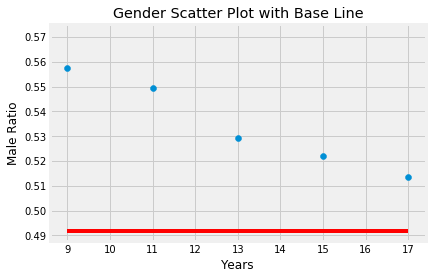

In [15]:
# set up a dataframe for year and Male Ratio of each year's sample
years = [9, 11, 13, 15, 17]
df_gender_scatter = pd.DataFrame(columns = ["year", "Male Ratio"])

for i in np.arange(5):
    # Calculating Male Ratio for each year
    Male_ratio = sum(df_list[i]["HRTOTLM"])/sum(df_list[i]["HRTOTLT"])
    # Add the result to gender ratio dataframe created above
    df_gender_scatter = df_gender_scatter.append(pd.Series([years[i],Male_ratio], index = df_gender_scatter.columns),ignore_index = True )

# Make a scatter plot with Male Ratio as y-axis and year as x-axis
plt.scatter(df_gender_scatter["year"], df_gender_scatter["Male Ratio"])
plt.title("Gender Scatter Plot with Base Line")
plt.xlabel("Years")
plt.ylabel("Male Ratio")

# Add population Male Ratio as a base line 
plt.plot([9,17], [pop_gender, pop_gender], color = "r")

# Show the resulted scatter plot
plt.show()


#### Interpretation of the t-test result and the scatter plot
From the t-test results table we can see that the gender proportion of the instructional employees in the U.S. postsecondary educational institutions was significantly different from the U.S. census from 2009 to 2017. The following years' gender distributions are all within the normal variations. From the scatter plot we can see that the male porpotion is getting closer to the population male porpotion each year, indicating there are more females employed and the gender distribution is getting more and more balanced. 

It's worth noticing that the data we are using for instructional employees in the U.S. postsecondary educational institutions has changed their census method starting from 2011. However, the changes was only in the way they are clustering different races, which does not affect our interpretation to the gender distribution. 

### Stacked bar chart by states for gender porpotion
- In this section, we'll map each institution to its home state. 
- Then we standardize number of instructional employees from both genders to ratios. 
- Finally we plot the overall gender ratio of each states by visualizing their variance from the national mean (pop_gender = 0.492)
- In the resulting plot, red bars towards the right indicate more male population than national mean
- In the resulting plot, blue bars towards the left indicate more female population than national mean

### Gender by States in 2009

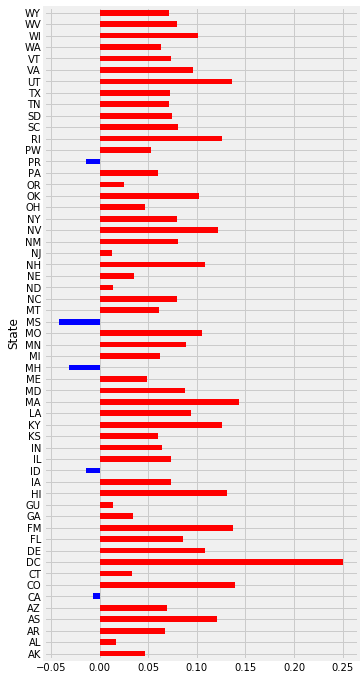

In [16]:

# re-organize data frame
temp = pd.merge(df_list[0], df_school_meta, on = 'UNITID', how = 'left')

# Compute State Sum
df_state = temp.groupby(['State']).sum()

# Convert Number to Ratio
df_state['HRTOTLM'] = df_state['HRTOTLM'] / df_state['HRTOTLT']
df_state['HRTOTLW'] = df_state['HRTOTLW'] / df_state['HRTOTLT']
state = df_state[['HRTOTLM', 'HRTOTLW']]

# Compute Deviation from national mean ratio 0.492
state_n = pd.DataFrame(columns=["Men", "positive"])
state_n["Men"] = df_state['HRTOTLM'] - pop_gender
state_n['positive'] = state_n["Men"] > 0

# Plot the bar chart
state_n["Men"].plot(kind='barh', figsize=(5,12), color=state_n.positive.map({True: 'red', False: 'blue'}))

### Gender by State in 2017

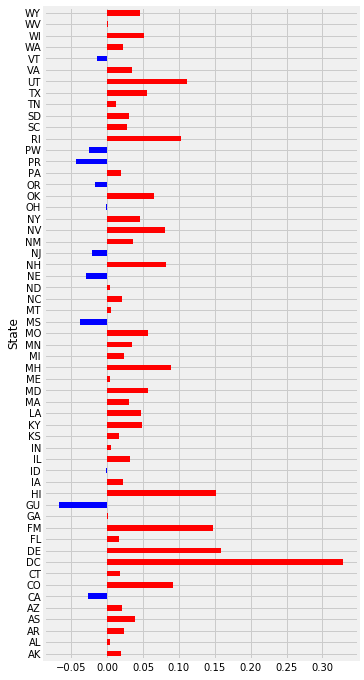

In [17]:
# re-organize data frame
temp = pd.merge(df_list[4], df_school_meta, on = 'UNITID', how = 'left')

# Compute State Sum
df_state = temp.groupby(['State']).sum()

# Convert Number to Ratio
df_state['HRTOTLM'] = df_state['HRTOTLM'] / df_state['HRTOTLT']
df_state['HRTOTLW'] = df_state['HRTOTLW'] / df_state['HRTOTLT']
state = df_state[['HRTOTLM', 'HRTOTLW']]

# Compute Deviation from national mean ratio 0.492
state_n = pd.DataFrame(columns=["Men", "positive"])
state_n["Men"] = df_state['HRTOTLM'] - pop_gender
state_n['positive'] = state_n["Men"] > 0

# Plot the bar chart
state_n["Men"].plot(kind='barh', figsize=(5,12), color=state_n.positive.map({True: 'red', False: 'blue'}))

#### Gender by States Result:
Comparing the gender by states stacked bar chart from 2009 to that from 2017, we observed an obvious change in gender composition in instructional employees
- The number of states have higher ratio of male employees decreased
- The number of states have higher ratio of female employees increased
- The overall gender composition moves towards national mean of 0.492
- Small states with significant lower population may be potential outliers in this dataset, as they exhibit unstable distribution.
- As we cannot acquire gender composition for each state, we use the national mean as expected standard. However, we shall acknowldege that there might be variance in state by state cases, and the above analysis is not within State analysis

### Stacked bar chart by region for gender porpotion
- Here we perform the same analysis as gender by states above, but we group the geographic category by regions
- Regions Categories include:
    - US Service Schools
    - Southwest
    - Southeast
    - Rocky Mountains
    - Plains
    - Outlying Areas
    - New England
    - Mid East
    - Great Lakes
    - Far West

### Gender by Region in 2009

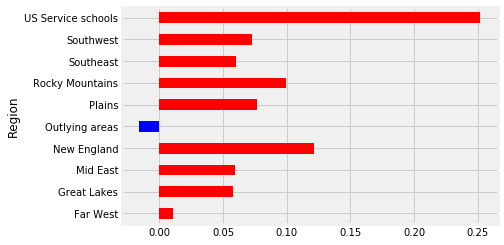

In [18]:
# re-organize data frame
temp = pd.merge(df_list[0], df_school_meta, on = 'UNITID', how = 'left')

# Compute Region Sum
df_region = temp.groupby(['Region']).sum()

# Convert Number to Ratio
df_region['HRTOTLM'] = df_region['HRTOTLM'] / df_region['HRTOTLT']
df_region['HRTOTLW'] = df_region['HRTOTLW'] / df_region['HRTOTLT']
region = df_region[['HRTOTLM', 'HRTOTLW']]
region_n = pd.DataFrame(columns=["Men", "positive"])

# Compute Deviation from 0.5
region_n["Men"] = df_region['HRTOTLM'] - 0.5
region_n['positive'] = region_n["Men"] > 0

# Plot the bar chart
region_n["Men"].plot(kind='barh', color=region_n.positive.map({True: 'red', False: 'blue'}))

### Gender by Region in 2017

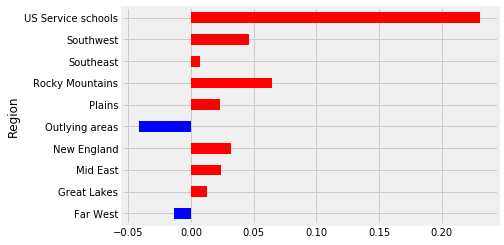

In [19]:
# re-organize data frame
temp = pd.merge(df_list[4], df_school_meta, on = 'UNITID', how = 'left')

# Compute Region Sum
df_region = temp.groupby(['Region']).sum()

# Convert Number to Ratio
df_region['HRTOTLM'] = df_region['HRTOTLM'] / df_region['HRTOTLT']
df_region['HRTOTLW'] = df_region['HRTOTLW'] / df_region['HRTOTLT']
region = df_region[['HRTOTLM', 'HRTOTLW']]
region_n = pd.DataFrame(columns=["Men", "positive"])

# Compute Deviation from 0.5
region_n["Men"] = df_region['HRTOTLM'] - 0.5
region_n['positive'] = region_n["Men"] > 0

# Plot the bar chart
region_n["Men"].plot(kind='barh', color=region_n.positive.map({True: 'red', False: 'blue'}))

#### Gender by Region Result:
Comparing the gender by regions stacked bar chart from 2009 to that from 2017, we observed an obvious change in gender composition in instructional employees, in a trend towards the national mean ratio of 0.492. Moreover, US Service schools and outlying areas are considered as outliers since the small data pool each year. Nevertheless, despite improvement in the gender composition, the national ratio of instructional employees by gender still favors the male.
- As we cannot acquire gender composition for each state, we use the national mean as expected standard. However, we shall acknowldege that there might be variance in state by state cases, and the above analysis is not within State analysis

## Racial Analysis

Next we will look into the racial composition among instructional staff in postsecondary educational institutions.  Again, let's first see if the racial composition is a good reflection of the overall U.S. population. As the mean and standard deviation for the true population is unknown and the vector is multimodal, we decide to perform a chi-square test to see the goodness of the fit.

### Chi-square analysis for the racial proportions

We want to see if the academic workspace is a good reflection of the general population. In other words, here we will use a chi-square test to see whether the sample proportion is the same as the population proportion.

**Null Hypothesis (H0)**: The sample and the population are from the same distribution.

**Alternative Hypothesis (H1)**: The sample and the population are NOT from the same distribution.

Before that, we want to calculate the expected proportions on our sample based on the population racial proportion.

In [20]:
# calculate sum of each year
df_sum_list = []
sample_total = []
for i in np.arange(0,5):
    df_sum_list.append(df_list[i].sum())
    
    # get the observed number of each race in this year
    # with the same order
    df_sum_list[i] = df_sum_list[i][["HRAIANT", "HRASIAT", "HRBKAAT", "HRNHPIT", "HRWHITT", "HR2MORT"]]
    
    # get total faculty count recorded this year
    sample_total.append(np.sum(df_sum_list[i]))

df_sum_list[0]

HRAIANT      3670.0
HRASIAT     49047.0
HRBKAAT     38964.0
HRNHPIT      1365.0
HRWHITT    520195.0
HR2MORT      3214.0
dtype: float64

In [21]:
sample_total

[616455.0, 640514, 1159613, 1165640, 1250755]

In [22]:
# create a dataframe to store the results of chi-square
df_chi = pd.DataFrame(columns = ["year", "different proportions", "p value"])

for i in np.arange(0,5):
    # perform chi-sqaure test
    # calculate expected counts
    pop_prop = census_race * sample_total[i]
    # get observed counts
    sample_prop = df_sum_list[i].values
    # perform chi-square
    chisq, p_val = chisquare(f_obs = sample_prop, f_exp= pop_prop)
    # We use the arbitary 0.05 cutoff
    # if p value < 0.05, we reject the null hypothesis
    if p_val < 0.05:
        result = True
    else:
        result = False
    # append the result to our table
    year = 9 + i * 2
    df_chi = df_chi.append(pd.Series([year,result, p_val], index=df_chi.columns),ignore_index=True )

df_chi
    

,year,different proportions,p value
0,9,True,0.0
1,11,True,0.0
2,13,True,0.0
3,15,True,0.0
4,17,True,0.0


Based on the result of the chi-square test, it seems that each year's racial composition is different from the census's data. Let's visualize the racial composition to get a better understanding.

### Visualization of racial porpotion 

In [23]:
census_race

array([0.012, 0.049, 0.13 , 0.002, 0.784, 0.023])

In [24]:
df_census = pd.DataFrame({'YEAR': "census","HRAIANT": 1.2,"HRASIAT": 4.9,"HRBKAAT":13.0, "HRNHPIT":0.2,
                                 "HRWHITT":78.4,"HR2MORT":2.3 },index=[0])
df_census

,YEAR,HRAIANT,HRASIAT,HRBKAAT,HRNHPIT,HRWHITT,HR2MORT
0,census,1.2,4.9,13.0,0.2,78.4,2.3


In [25]:
#build the dataframe for plot
#prepare for building the dataframe
col_list = ["HRAIANT", "HRASIAT", "HRBKAAT", "HRNHPIT", "HRWHITT", "HR2MORT"]
df_plot = pd.DataFrame(columns=col_list)
#loop for building the plotting dataframe
for i in np.arange(5):
    df_plot = df_plot.append(df_sum_list[i]/sum(df_sum_list[i])*100,ignore_index=True)
df_plot.insert(loc=0, column='YEAR', value=['2009','2011','2013','2015','2017'])
df_plot=pd.concat([df_census, df_plot])

y= df_plot.set_index('YEAR')
df_plot

,YEAR,HRAIANT,HRASIAT,HRBKAAT,HRNHPIT,HRWHITT,HR2MORT
0,census,1.200000,4.900000,13.000000,0.200000,78.400000,2.300000
0,2009,0.595339,7.956299,6.320656,0.221427,84.384910,0.521368
1,2011,0.585936,8.512382,6.373943,0.274467,83.563357,0.689915
2,2013,0.602874,8.329848,6.553135,0.268797,83.403687,0.841660
3,2015,0.588432,8.888765,6.637898,0.252394,82.611098,1.021413
4,2017,0.571815,9.645374,6.815803,0.265759,81.597275,1.103973


<Figure size 3600x3600 with 0 Axes>

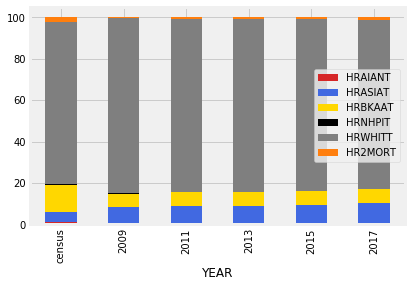

<Figure size 3600x3600 with 0 Axes>

In [26]:
#Stacked bar
colors = ['tab:red', '#4169E1', '#FFD700', 'k', 'tab:grey','tab:orange']
y.plot.bar(stacked=True,color=colors)
plt.figure(figsize=(50,50))

#### Interpretation
The census data shows that the White American is the majority which makes up 78.4% of population in the United States. Native Hawaiian(or Other Pacific Islander) is the main minority which makes up only 0.2% of population in the United States.

From the stacked bar graph above, we can find that there is a change in instructional staff diversity by race from 2009 to 2017. The proportion of majority (White American) decreases and the proportions of Asian American, Black(or African) American, Native Hawaiian(or Other Pacific Islander) and Multiple race Americna increase. However, for American Indian(or Alaska) Native group, the proportion in instructional staff decreases. Compared to census proportion, White American, Native Hawaiian(or Other Pacific Islander) and Asian American have higher proportion in instructional staff. And Black(of African) American, American Indian(or Alaska) Native and Multiple Races have lower proportion in instructional staff than in census. 

## Ethics and Privacy

The data we used for this project is published on the National Center for Education Statistics and United States Census Bureau websites, and it is specified on their  websites that people are given full permission to download and conduct research with these datasets. The datasets for our research only contain details about gender, race and employment types in each postsecondary educational institution. There is no private information of each employee, and the data only counts the total number of employees according to each classification. When we explore the datasets, we found that gender was only categorized as female and male. Third gender and transgender were not considered as possible classifications for the dataset. However, gender is a social concept and gender identity is not bound by gender binary(female and male). As many states begin to recognize a third gender and residents have the option of a third gender identifier on their identification documents,  the genders other than gender binary should be taken into account when we study diversity in instructional staff of U.S. postsecondary educational institutions by gender. As above, there is a potential bias in the datasets.

There are also non-residents aliens in the National Center for Education Statistics dataset, but these foreign aliens are not included in the United States Census. Additionally, people in  the “two or more races” category may be double-counted by the single race identity. 
	
In order to resolve these issues, we took the following actions: 
1. We removed non-residents aliens from our datasets and only focus on residents.
2. Regarding the overlap census of races in both datasets, we stick to the standards of 2010 U.S. race census, and only compare each race with its own category to compute standard deviation to avoid further inaccuracy. 
3. Moreover, although we are aware of the limitation in the gender self-identification options in census, we have no other information to resolve this issue, but we included this discussion in our research for hope in future research.



## Result

Above all, we find that there is a significant difference between the proportion from the instructional employees in U.S. postsecondary educational institutions and the proportion from the U.S. census by race from 2009 to 2017. And by gender, the significant difference between those two proportion only appeared in 2009 and 2011. What’s more, there is an obvious change in both gender and race proportion in instructional employees from 2009 to 2017, and the gender composition moves towards census mean of 0.492.The diversity in the instructional employees has changed.


## Discussion

As we mentioned in the results, there has been a change in both gender and racial diversity in instructional staff among the U.S. postsecondary educational institutions from 2009 to 2017. This conclusion would show that there has been increased awareness on the importance of gender and racial diversity in the U.S. postsecondary educational institutions. 

Through the gender diversity by states and by region analysis, we can see that each state/region is significantly different from each other. For future studies, we can get census data of both gender and racial composition from each state/region rather than use the national-wide census as a baseline for comparison, in order to get a more accurate reflection of both gender and racial diversity in the U.S. 

The categories of gender in the data sets are not inclusive enough, which only provide the traditional gender dimensions of male and female. The population of people who have gender identifies other than these two categories are excluded from the census. For future analysis of diversity, more gender categories should be added to reflect every possible group. 

For future racial diversity comparisons, we would need a more holistic way of calculating the racial diversity, since in our current analysis we could only tell that there is a difference between racial proportions in staff among the U.S. postsecondary educational institutions and the U.S. national racial proportion. With a holistic way of calculating the racial diversity index, we would know exactly if the diversity has been improved, and if so, by how much. 

The general results of our data analysis indicates that we are on the right track towards creating an inclusive teaching and learning environment, so that instructional employees with diverse backgrounds would better benefit students with multicultural backgrounds in learning and understanding their own cultures. 

